# CNN
### Name: Tanmay Walke
### Date: 24 March 2025
### Class: TY-CSE(AI)
### Roll No.: 65

In [ ]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-77.0.3-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 8.4 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/11.1 MB 7.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 6.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 6.5 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 6.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 6.0 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 5.9 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 5.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 4.5 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 4.3 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Loading my MNIST Dataset

In [66]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
# Check data types
print(f"x_train data type: {type(x_train)}")
print(f"y_train data type: {type(y_train)}")
print(f"x_test data type: {type(x_test)}")
print(f"y_test data type: {type(y_test)}\n")

# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

# Check if there is any missing data
print(f"Any missing values in x_train: {np.any(np.isnan(x_train))}")
print(f"Any missing values in y_train: {np.any(np.isnan(y_train))}")
print(f"Any missing values in x_test: {np.any(np.isnan(x_test))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")

x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Any missing values in x_train: False
Any missing values in y_train: False
Any missing values in x_test: False
Any missing values in y_test: False


## Number of classews=10(0-9)

In [68]:
num_labels = len(np.unique(y_train))
num_labels

10

## Visualization of Some Digits along with their respective labels

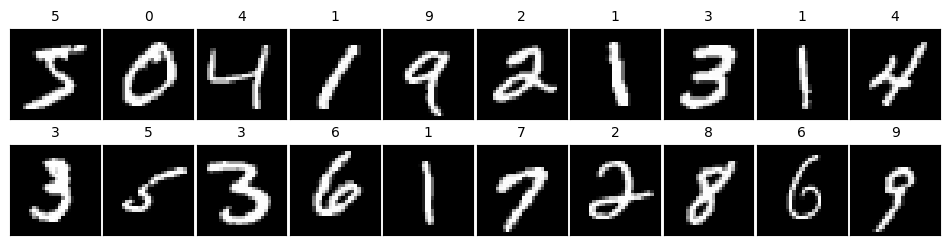

In [70]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01}, 
                             squeeze=True)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]), fontsize=10)
        
    plt.tight_layout()
    plt.show()

visualize_images(x_train)

## **Visualizing an Image with Pixel Values**

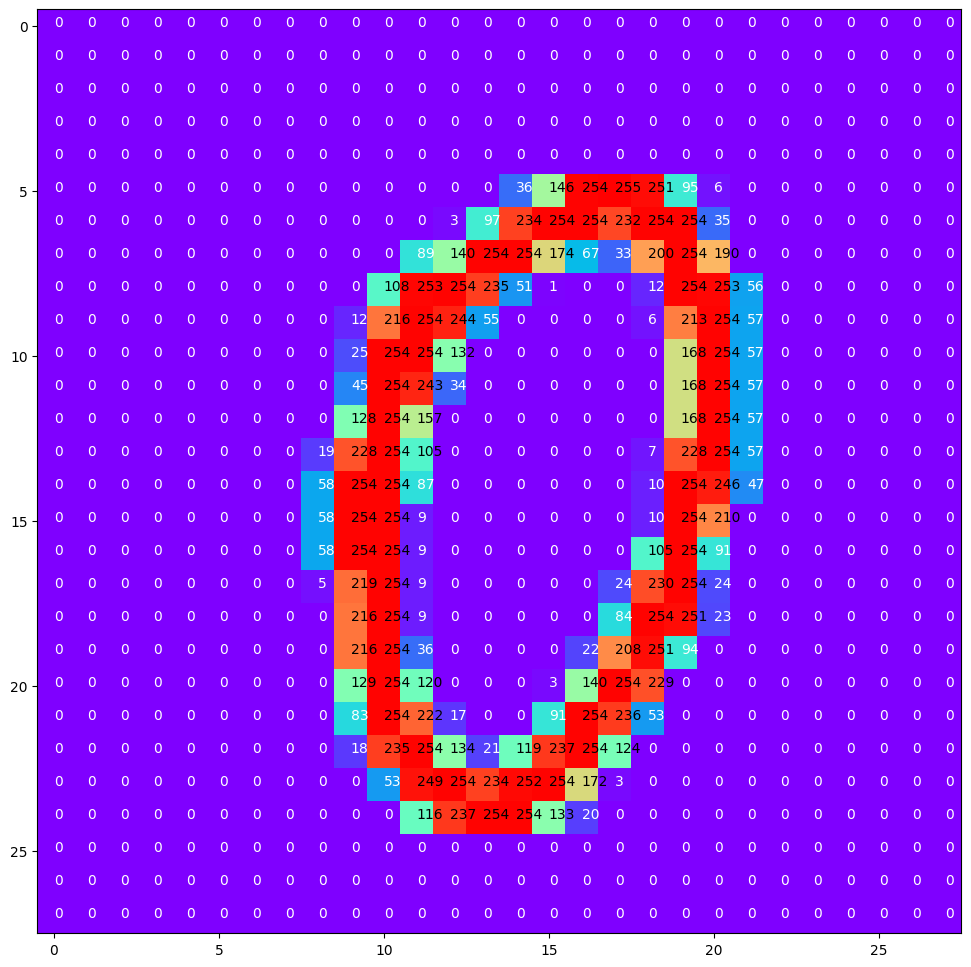

In [84]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="rainbow")
    width, height = img.shape
    threshold = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x), 
                       color='white' if img [x][y]<threshold else 'black')

pixel_visualize(x_train[1000])

##  **Preprocessing**

In [9]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# **Model Building**

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [ ]:
model.summary()

## **Using ImageDataGenerator**

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
datagen.fit(x_train)

## Running my model for 50 epochs

In [32]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=512), epochs=50, 
                    validation_data=(x_test, y_test))


Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.9769 - loss: 0.0779 - precision: 0.9801 - recall: 0.9748 - val_accuracy: 0.9892 - val_loss: 0.0378 - val_precision: 0.9906 - val_recall: 0.9890
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.9774 - loss: 0.0726 - precision: 0.9800 - recall: 0.9746 - val_accuracy: 0.9896 - val_loss: 0.0332 - val_precision: 0.9897 - val_recall: 0.9890
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.9794 - loss: 0.0704 - precision: 0.9819 - recall: 0.9770 - val_accuracy: 0.9931 - val_loss: 0.0224 - val_precision: 0.9936 - val_recall: 0.9925
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 127ms/step - accuracy: 0.9794 - loss: 0.0696 - precision: 0.9817 - recall: 0.9772 - val_accuracy: 0.9869 - val_loss: 0.0432 - val_precision: 0.9885 - val_recall: 0.9855
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.9815 - loss: 0.0636 - precision: 0.9837 - recall: 0.9796 - val_accuracy: 0.9914

# **Results and Visualization of the Model**

In [35]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## **Classification Report**

In [36]:
class_labels = ['0','1','2','3','4','5','6','7','8','9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## **Train & Validation Accuracy** 

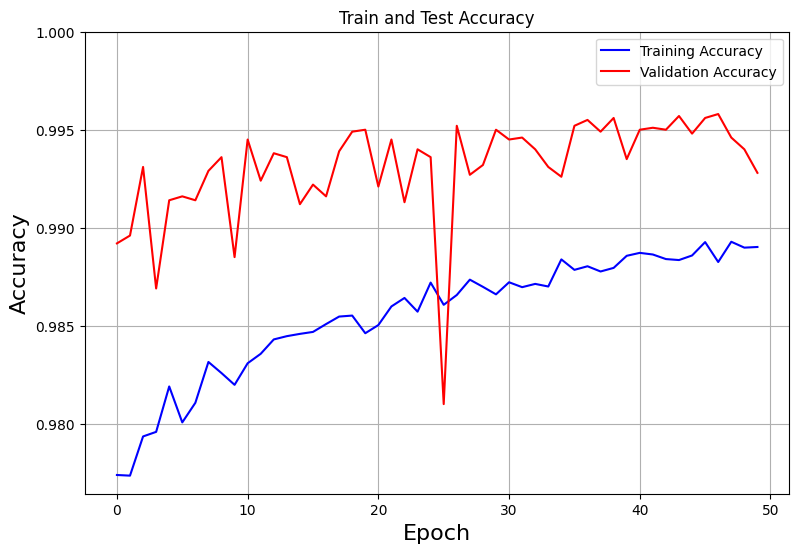

In [58]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Train and Test Accuracy')
plt.grid(True)



In [38]:
loss, precision, recall, acc=model.evaluate(x_test, y_test, verbose=False)
print('Test Accuracy: ', acc)
print('Test Loss: ', loss)
print('Test Precision: ', precision)
print('Test Recall: ', recall)

Test Accuracy:  0.9927999973297119
Test Loss:  0.020255275070667267
Test Precision:  0.9933940768241882
Test Recall:  0.9925000071525574


## Confusion Matrix

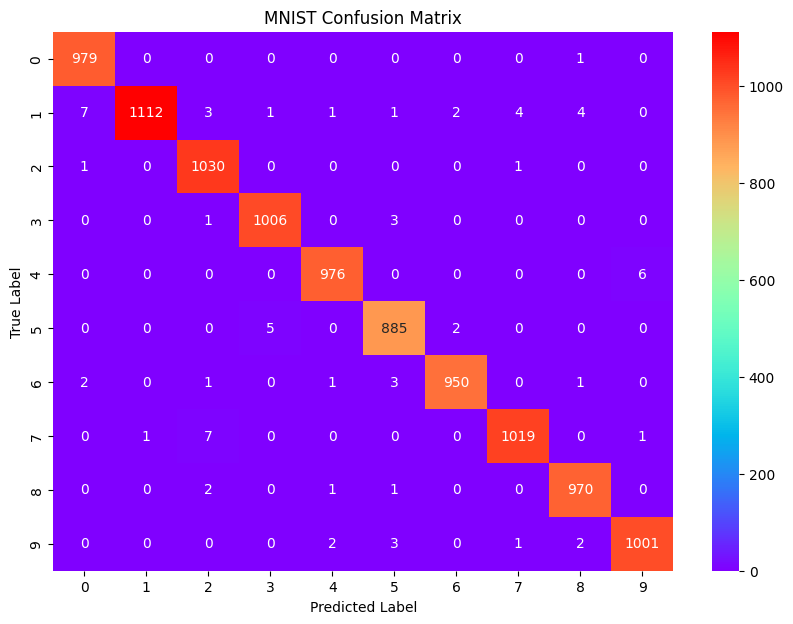

In [57]:
y_pred_labels = y_pred_class
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rainbow", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("MNIST Confusion Matrix")
plt.show()

# **Model Saving**

In [39]:
model.save('mnist_model.h5')

# **Testing Results**

In [40]:
import random
random = random.randint(0, x_test.shape[0])
random

1160

In [41]:
test_image = x_test[random]
y_test[random]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

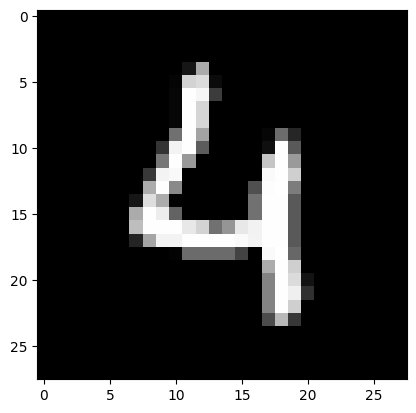

In [42]:
plt.imshow(test_image.reshape(28,28), cmap='gray');

In [43]:
test_data = x_test[random].reshape(1,28,28,1)
probability = model.predict(test_data)
probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1.0302369e-07, 1.4598822e-07, 2.1207418e-07, 2.4510113e-08,
        9.9995184e-01, 1.1555841e-06, 1.3795576e-05, 3.2519239e-07,
        2.4090621e-06, 2.9953013e-05]], dtype=float32)

In [44]:
predicted_classes = np.argmax(probability)
predicted_classes

np.int64(4)

In [45]:
print(f'Predicted class: {predicted_classes}')
print(f'Predicted class probability value: {(np.argmax(probability, axis=-1))[0]}')
print(f'Probability values of other classes: \n{probability}')

Predicted class: 4
Predicted class probability value: 4
Probability values of other classes: 
[[1.0302369e-07 1.4598822e-07 2.1207418e-07 2.4510113e-08 9.9995184e-01
  1.1555841e-06 1.3795576e-05 3.2519239e-07 2.4090621e-06 2.9953013e-05]]


# **Misclassified Samples**

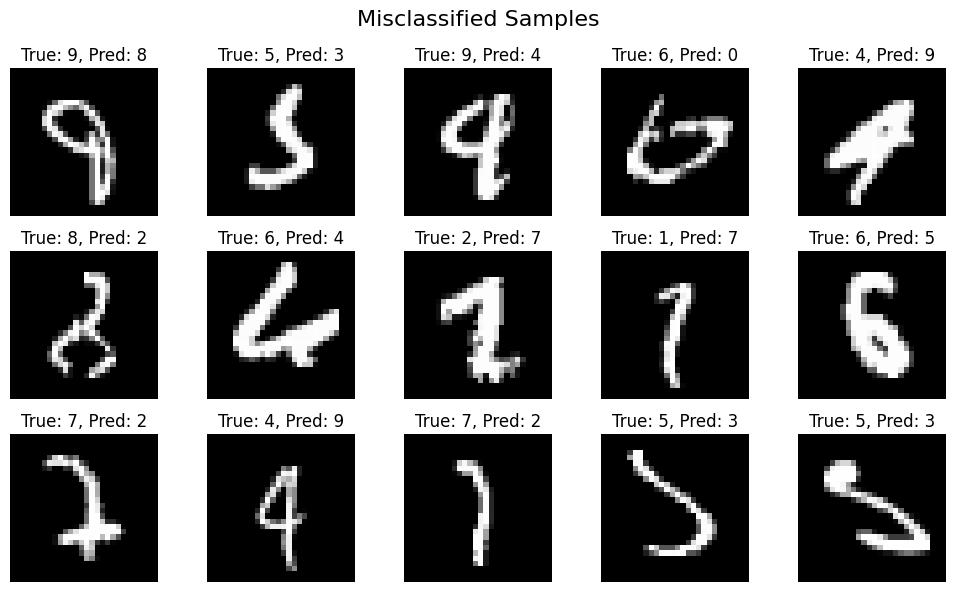

In [46]:
y_test_labels = np.argmax(y_test, axis=1)

misclassified_idx = np.where(y_pred_class != y_test_labels)[0]

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
fig.suptitle("Misclassified Samples", fontsize=16)

for i, ax in enumerate(axes.flat):
    idx = misclassified_idx[i]
    ax.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_test_labels[idx]}, Pred: {y_pred_class[idx]}")
    ax.axis("off")

plt.tight_layout()
plt.show()